# <font color = steelblue> Setting up the notebook

In [51]:
# manage width of jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [52]:
# import packages
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import xarray as xr
import numpy as np
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from tabulate import tabulate

In [53]:
# set up plotting preferences
plt.rcParams["image.cmap"] = "viridis"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

# <font color = steelblue> Import & Manipulate data

In [54]:
# import data (advection & non-advection)
atl = xr.open_dataset('C:/Users/nicol/Desktop/SOAC/Biofouling/Plotting_3d/Try_SubAtl_Jan_2004_01x1res_170days_60dtsecs_12hrsoutdt.nc')
atlna = xr.open_dataset('C:/Users/nicol/Desktop/SOAC/Biofouling/Plotting_3d/No_advectionSubAtl_Jan_2004_01x1res_170days_60dtsecs_12hrsoutdt.nc')

In [55]:
# define lists to use later
time = atl.time[-1,:].values.astype('datetime64[D]')   # time series for each particle
particle_number = np.arange(len(atl.z[:, 0]))          # number of all the particles we start with
size = np.unique(atl.r_pl.values)                      # list of different sizes we use
density = np.unique(atl.rho_pl.values)                 # list of different densities we use

In [56]:
# separate into densities & sizes
d920 = atl.where(atl.rho_pl == density[2])      # 920kg/m3  (all sizes)
d840 = atl.where(atl.rho_pl == density[1])      # 840kg/m3  (all sizes)
d30 = atl.where(atl.rho_pl == density[0])       # 30kg/m3   (all sizes)

s02 = atl.where(atl.r_pl == size[4])            # 1e-2 m    (all densities)
s03 = atl.where(atl.r_pl == size[3])            # 1e-3 m    (all densities)
s04 = atl.where(atl.r_pl == size[2])            # 1e-4 m    (all densities)
s05 = atl.where(atl.r_pl == size[1])            # 1e-5 m    (all densities)
s06 = atl.where(atl.r_pl == size[0])            # 1e-6 m    (all densities)

In [57]:
# take 840kg/m3 & all sizes
d84s2 = atl.where((atl.rho_pl == density[1]) & (atl.r_pl == size[4]), drop = True)      # 840kg/m3 & 1e-2 m
d84s3 = atl.where((atl.rho_pl == density[1]) & (atl.r_pl == size[3]), drop = True)      # 840kg/m3 & 1e-3 m
d84s4 = atl.where((atl.rho_pl == density[1]) & (atl.r_pl == size[2]), drop = True)      # 840kg/m3 & 1e-4 m
d84s5 = atl.where((atl.rho_pl == density[1]) & (atl.r_pl == size[1]), drop = True)      # 840kg/m3 & 1e-5 m
d84s6 = atl.where((atl.rho_pl == density[1]) & (atl.r_pl == size[0]), drop = True)      # 840kg/m3 & 1e-6 m

np_cht = np.arange(len(d84s2.z[:,0]))   # number of particles for density, size pairs

In [58]:
# take 1e-04m & all densities
d30s4 = atl.where((atl.rho_pl == density[0]) & (atl.r_pl == size[2]), drop = True)       # 1e-4 m &  30kg/m3
d84s4 = atl.where((atl.rho_pl == density[1])  & (atl.r_pl == size[2]), drop = True)      # 1e-4 m &  840kg/m3
d92s4 = atl.where((atl.rho_pl == density[2])  & (atl.r_pl == size[2]), drop = True)      # 1e-4 m &  920kg/m3

In [59]:
# separate chosen particles in subpolar & subtropic
BC_lat = 30    # we define the limit of subpolar & subtropic particles to be at 30N

d84s2sp = d84s2.where((d84s2.lat > BC_lat), drop = True)          # subpolar
d84s5sp = d84s5.where((d84s5.lat > BC_lat), drop = True)
d84s6sp = d84s6.where((d84s6.lat > BC_lat), drop = True)

d84s2st = d84s2.where((d84s2.lat <= BC_lat), drop = True)         # subtropic
d84s5st = d84s5.where((d84s5.lat <= BC_lat), drop = True)
d84s6st = d84s6.where((d84s6.lat <= BC_lat), drop = True)

# <font color = 'steelblue'> Depth Profile</font>

#### <font color = 'steelblue'> all particles </font>

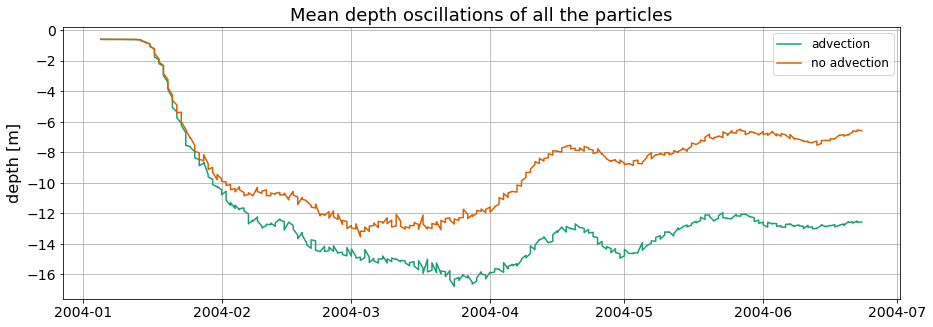

In [60]:
# mean depth profile of all particles with and without advection
plt.figure(figsize=(15,5))
plt.title('Mean depth oscillations of all the particles', size = 18)

plt.plot(time,   -atl.z.mean(dim = 'traj', skipna = True), label = 'advection')
plt.plot(time, -atlna.z.mean(dim = 'traj', skipna = True), label = 'no advection')

plt.ylabel('depth [m]', fontsize = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.grid()
plt.legend(fontsize = 'large')

#### <font color = 'steelblue'> per density & per size </font>

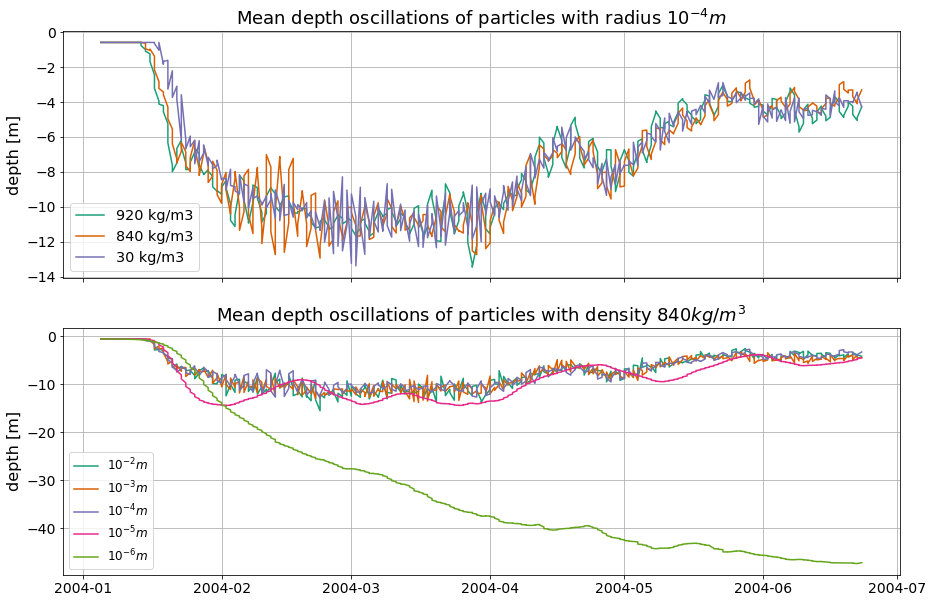

In [61]:
fig, ax = plt.subplots(2,1, sharex=True, figsize=(15,10))

# mean depth profile of all densities for diameter 1e-4m
ax[0].plot(time, -d920.z.where(atl.r_pl == size[2]).mean(dim = 'traj', skipna = True), label = '920 kg/m3')
ax[0].plot(time, -d840.z.where(atl.r_pl == size[2]).mean(dim = 'traj', skipna = True), label = '840 kg/m3')
ax[0].plot(time, -d30.z.where(atl.r_pl == size[2]).mean(dim = 'traj', skipna = True), label = '30 kg/m3')

ax[0].set_title('Mean depth oscillations of particles with radius $10^{-4}m$', size = 18)
ax[0].set_ylabel('depth [m]', fontsize = 16)
ax[0].legend(fontsize = 'x-large', loc = 'lower left')
ax[0].yaxis.set_tick_params(labelsize=14)
ax[0].xaxis.set_tick_params(labelsize=14)
ax[0].grid()

# mean depth profile of all sizes for density 840kg/m3
ax[1].plot(time, -s02.z.where(atl.rho_pl == density[1]).mean(dim = 'traj', skipna = True), label = '$10^{-2}m$')
ax[1].plot(time, -s03.z.where(atl.rho_pl == density[1]).mean(dim = 'traj', skipna = True), label = '$10^{-3}m$')
ax[1].plot(time, -s04.z.where(atl.rho_pl == density[1]).mean(dim = 'traj', skipna = True), label = '$10^{-4}m$')
ax[1].plot(time, -s05.z.where(atl.rho_pl == density[1]).mean(dim = 'traj', skipna = True), label = '$10^{-5}m$')
ax[1].plot(time, -s06.z.where(atl.rho_pl == density[1]).mean(dim = 'traj', skipna = True), label = '$10^{-6}m$')

ax[1].set_title('Mean depth oscillations of particles with density $840kg/m^{3}$', size = 18)
ax[1].set_ylabel('depth [m]', fontsize = 16)
ax[1].legend(fontsize = 'large')
ax[1].yaxis.set_tick_params(labelsize=14)
ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].grid()

Effects:

- density plays a very small role in the mean depth oscilations of the particles --> continued analysis with only 840kg/m3 (hard plastics)
- big differences among the 1e-6, 1e-5 and group(1e-2, 1e-3, 1e-4) --> continued with 1e-6, 1e-5 and 1e-2 diameter

#### <font color = 'steelblue'> chosen types </font>

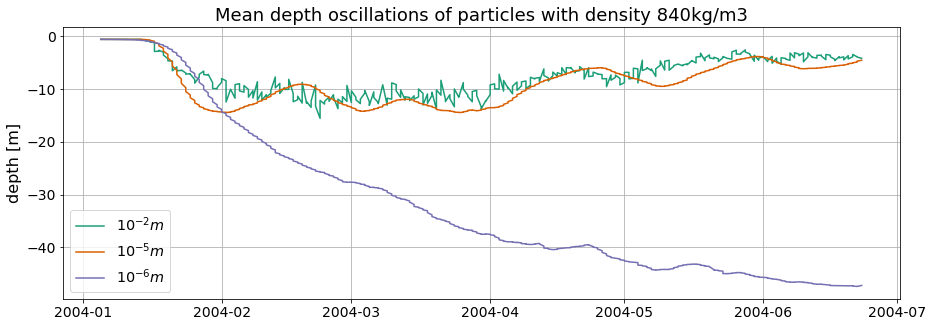

In [62]:
# mean depth profile of chosen types
plt.figure(figsize = (15,5))

plt.plot(time, -d84s2.z.mean(dim = 'traj', skipna = True), label = '$10^{-2}m$')
plt.plot(time, -d84s5.z.mean(dim = 'traj', skipna = True), label = '$10^{-5}m$')
plt.plot(time, -d84s6.z.mean(dim = 'traj', skipna = True), label = '$10^{-6}m$')

plt.title('Mean depth oscillations of particles with density 840kg/m3', size = 18)
plt.ylabel('depth [m]', fontsize = 16)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.grid()
plt.legend(fontsize = 'x-large')

# <font color = 'steelblue'> Trajectory </font>

100%|██████████| 100/100 [00:00<00:00, 215.69it/s]


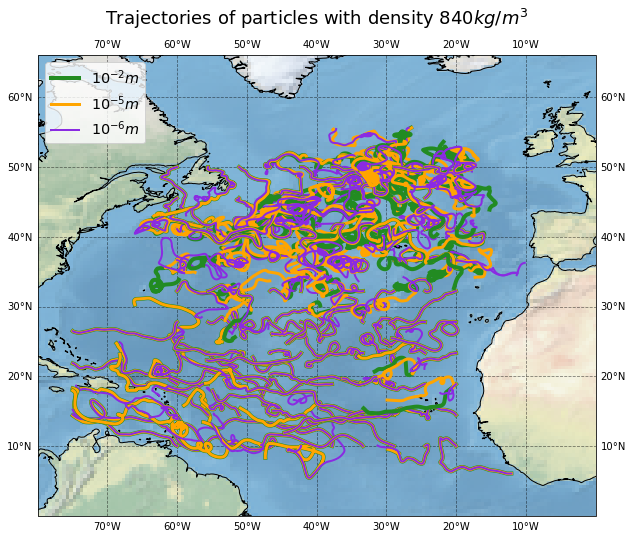

In [63]:
plt.figure(figsize = (10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-80, 0, 0, 60])
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='black', alpha=0.5, linestyle='--')
ax.coastlines(resolution = '50m')

for i in tqdm(np_cht):
    ax.plot(d84s2.lon[i, :],d84s2.lat[i, :], color = 'forestgreen', linewidth = 4) 
    ax.plot(d84s5.lon[i, :],d84s5.lat[i, :], color = 'orange', linewidth = 3)
    ax.plot(d84s6.lon[i, :],d84s6.lat[i, :], color = 'blueviolet', linewidth = 2) 

ax.plot(d84s2.lon[-1, :],d84s2.lat[-1, :], color = 'forestgreen', label = '$10^{-2}m$', linewidth = 4) 
ax.plot(d84s5.lon[-1, :],d84s5.lat[-1, :], color = 'orange', label = '$10^{-5}m$', linewidth = 3) 
ax.plot(d84s6.lon[-1, :],d84s6.lat[-1, :], color = 'blueviolet', label = '$10^{-6}m$', linewidth = 2) 

plt.title('Trajectories of particles with density $840kg/m^{3}$', size = 18, pad = 15)
plt.legend(fontsize = 'x-large', loc = 'upper left')
plt.show()

# <font color = 'steelblue'> first & final positions </font>

Text(0.5, 1.0, '5 January 2004')

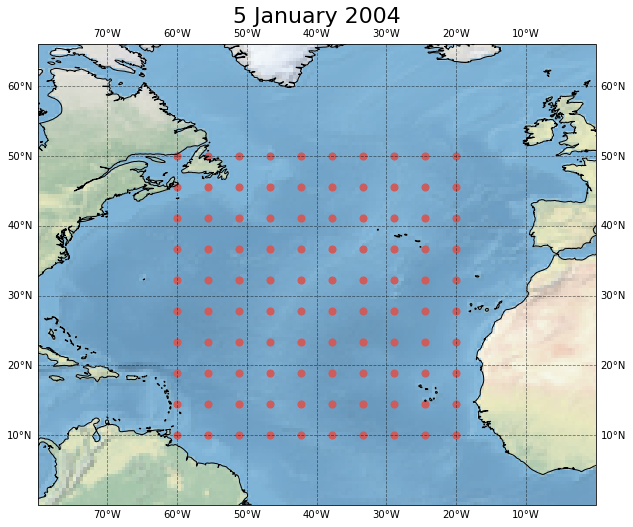

In [64]:
# initial position
plt.figure(figsize = (10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-80, 0, 0, 60])
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='black', alpha=0.5, linestyle='--')
ax.coastlines(resolution = '50m')

ax.scatter(d84s2.lon[:, 0],d84s2.lat[:, 0], color = 'indianred', label = 'starting position', s = 50) 

plt.title('5 January 2004', size = 22)

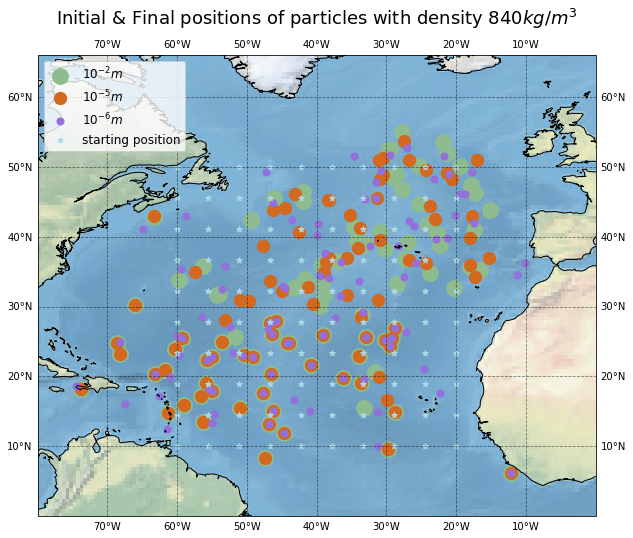

In [65]:
# initial & final position of chosen particles
plt.figure(figsize = (10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([-80, 0, 0, 60])
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='black', alpha=0.5, linestyle='--')
ax.coastlines(resolution = '50m')

ax.scatter(d84s2.lon[:, -1],d84s2.lat[:, -1], color = 'darkseagreen', label = '$10^{-2}m$', s = 250) 

ax.scatter(d84s5.lon[:, -1],d84s5.lat[:, -1], color = 'chocolate', label = '$10^{-5}m$', s = 150) 

ax.scatter(d84s6.lon[:, -1],d84s6.lat[:, -1], color = 'mediumpurple', label = '$10^{-6}m$', s =50) 

ax.scatter(d84s2.lon[:, 0],d84s2.lat[:, 0], color = 'lightblue', label = 'starting position', marker = '*') 

plt.title('Initial & Final positions of particles with density $840kg/m^{3}$', size = 18, pad =15)
plt.legend(fontsize = 'large', loc = 'upper left')

# <font color = 'steelblue'> when do they start sinking? </font>

In [66]:
# define function to calculate sinking time
def calculate_sinking_time (data):
    st = []
    lon = []
    lat = []
    
    for i in range(len(data.z[:,0])):
        # if the particles sink, save time, lat, lon of the first time they go under 0.6m
        if (data.time[i, (np.nanargmax(data.z[i,:].values > 0.6))].values) != data.time[0,0].values:         
            st.append(data.time[i, (np.nanargmax(data.z[i,:].values > 0.6))].values - data.time[0,0].values)
            lat.append(data.lat[i, (np.nanargmax(data.z[i,:].values > 0.6))].values)
            lon.append(data.lon[i, (np.nanargmax(data.z[i,:].values > 0.6))].values)
        # if the particles don't sink, set time = 0 and save lat, lon of their final position
        else :
            st.append(0)
            lat.append(data.lat[i, -1].values)
            lon.append(data.lon[i, -1].values)
    
    # save results in dataframes
    lon = np.reshape(lon,len(data.z[:,0]))       
    lat = np.reshape(lat,len(data.z[:,0]))
    st = np.reshape(st,len(data.z[:,0]))

    df = pd.DataFrame(lon, columns = ['lon'])
    df['lat'] = lat
    df['st'] = (st / np.timedelta64(1, 's'))  * 1.15740741 * 10**(-5) 

    df1 = df[df.st != 0]        # df1 contains particles that sink
    df0 = df[df.st == 0]        # df0 contains particles that don't sink
    
    return df, df1, df0

In [67]:
# define plotting function
def plot_st(data0, data1, size):
    fig, ax = plt.subplots(figsize = (7,7), subplot_kw = dict(projection=ccrs.PlateCarree()))
    
    sns.scatterplot(data = data0, x = 'lon', y = 'lat' ,
                    s= 50, edgecolor = 'darkred', facecolor="None", legend = False, 
                    ax =ax )

    sns.scatterplot(data = data1, x = 'lon', y = 'lat' , hue = 'st',
                    s= 50, palette = 'flare', legend = False, 
                    ax =ax ) 

    norm = plt.Normalize(data1.st.min(), data1.st.max())
    sm = plt.cm.ScalarMappable(cmap="flare", norm=norm)
    sm.set_array([])

    ax.figure.colorbar(sm, ax = ax, 
                       orientation="horizontal", pad=0.08, fraction=0.055,
                        label = 'Sinking time scale [days]')

    ax.stock_img()
    ax.set_extent([-80, 0, 0, 60])
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='black', alpha=0.5, linestyle='--')
    ax.coastlines(resolution = '50m')
    
    plt.title('Radius '+size, size = 16)
    plt.show()

#### <font color = steelblue> density 840 

In [68]:
st2, st21, st20 = calculate_sinking_time(d84s2)
st5, st51, st50 = calculate_sinking_time(d84s5)
st6, st61, st60 = calculate_sinking_time(d84s6)

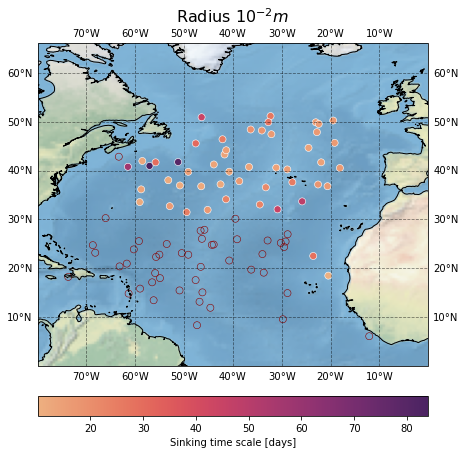

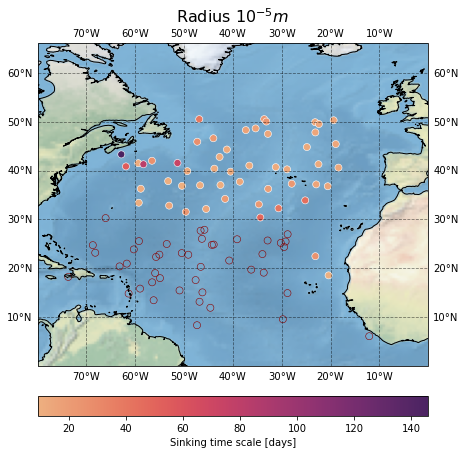

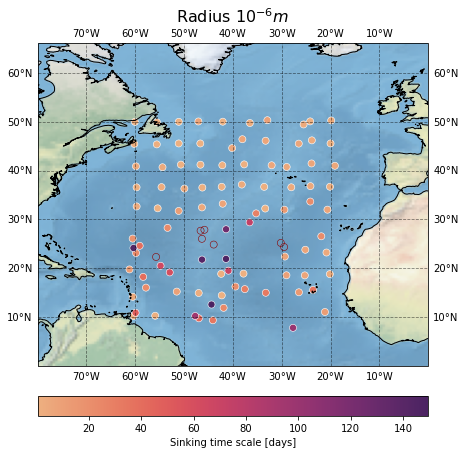

In [69]:
plot_st(st20, st21, '$10^{-2}m$')
plot_st(st50, st51, '$10^{-5}m$')
plot_st(st60, st61, '$10^{-6}m$')

# <font color = 'steelblue'> what is the maximum depth they reach? </font>

In [70]:
# define function to calculate the maximum depth that the chosen particles reach
def calculate_maxDepth(data):
    md = []
    lon = []
    lat = []
    
    for i in range(len(np_cht)):
        # if the particles sink, save they max depth & the lat/lon of max depth
        if (data.z[i, (data.z[i,:].argmax(dim = 'obs').values)]) > 0.6:
            md.append(data.z[i, (data.z[i,:].argmax(dim = 'obs'))].values)
            lat.append(data.lat[i, (data.z[i,:].argmax(dim = 'obs'))].values)
            lon.append(data.lon[i, (data.z[i,:].argmax(dim = 'obs'))].values)
        # if the particles don't sink, set they max depth as 0.6 (surface for MESUDA) & save their last lat/lon
        else :
            md.append(0.6)
            lat.append(data.lat[i, -1].values)
            lon.append(data.lon[i, -1].values)
    
    # save data in dataframe
    lon = np.reshape(lon,len(np_cht))
    lat = np.reshape(lat,len(np_cht))
    md = np.reshape(md,len(np_cht))

    df = pd.DataFrame(lon, columns = ['lon'])
    df['lat'] = lat
    df['md'] = md 

    df1 = df[df.md != 0.6]    # sinking particles
    df0 = df[df.md == 0.6]    # non sinking particles
    
    return df0, df1

In [71]:
# define plotting function
def plot_md(data0, data1, size):
    fig, ax = plt.subplots(figsize = (7,7), subplot_kw = dict(projection=ccrs.PlateCarree()))
    
    sns.scatterplot(data = data0, x = 'lon', y = 'lat' ,
                    s= 50, edgecolor = 'midnightblue', facecolor="None", legend = False, 
                     ax =ax )

    sns.scatterplot(data = data1, x = 'lon', y = 'lat' , hue = 'md',
                    s= 50, palette = 'viridis_r', legend = False, 
                    ax =ax ) 

    norm = plt.Normalize(md21.md.min(), md21.md.max())
    sm = plt.cm.ScalarMappable(cmap="viridis_r", norm=norm)
    sm.set_array([])

    ax.figure.colorbar(sm, ax = ax, 
                       orientation="horizontal", pad=0.08, fraction=0.055,
                        label = 'Maximum Depth [m]')

    ax.stock_img()
    ax.set_extent([-80, 0, 0, 60])
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='black', alpha=0.5, linestyle='--')
    ax.coastlines(resolution = '50m')
     
    plt.title('Radius '+size, size = 16)
    plt.show()

In [72]:
md20, md21 = calculate_maxDepth(d84s2)
md50, md51 = calculate_maxDepth(d84s5)
md60, md61 = calculate_maxDepth(d84s6)

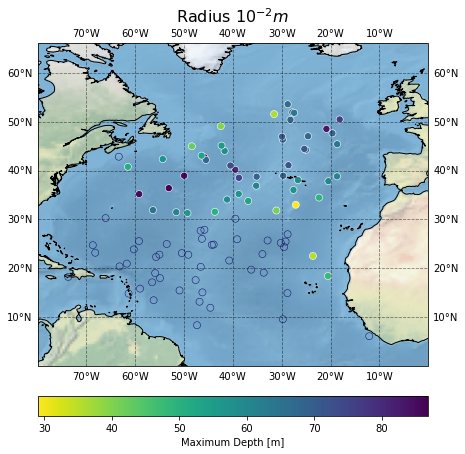

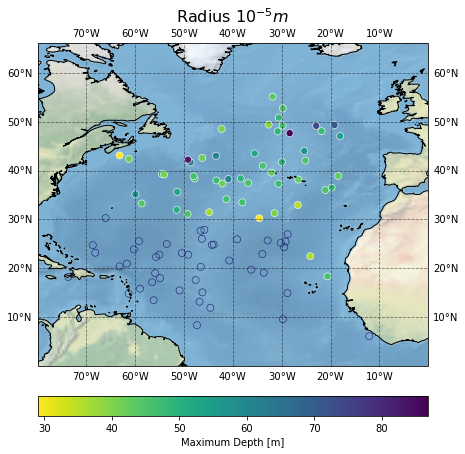

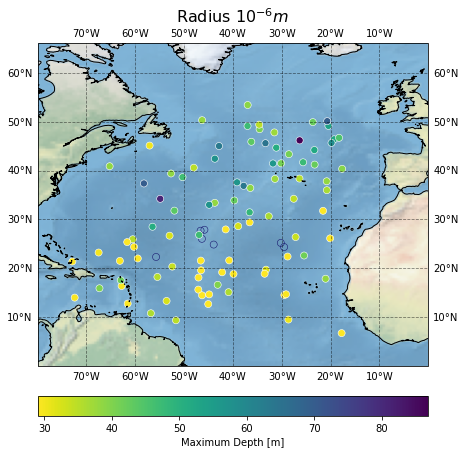

In [73]:
plot_md(md20, md21, '$10^{-2}m$')
plot_md(md50, md51, '$10^{-5}m$')
plot_md(md60, md61, '$10^{-6}m$')

# <font color = 'steelblue'> How many are left on the surface? </font>

In [74]:
IP = np.count_nonzero(atl.z[:, 0].values == 0.6)         # count initial particles on the surface
FP = np.count_nonzero(atl.z[:, -1].values == 0.6)        # count final particles on the surface 

IPsp = np.count_nonzero(atl.z[:, 0].where(atl.lat > 30).values == 0.6)    # repeat for subpolar
FPsp = np.count_nonzero(atl.z[:, -1].where(atl.lat > 30).values == 0.6)

IPst = np.count_nonzero(atl.z[:, 0].where(atl.lat <= 30).values == 0.6)   # repeat for subtropic
FPst = np.count_nonzero(atl.z[:, -1].where(atl.lat <= 30).values == 0.6)

In [75]:
print('Only', round(FP / IP  * 100), '% of the total particles we dropped stayed on the surface')
print('Only', round(FPsp / IPsp  * 100), '% of the total particles we dropped in the subpolar region stayed on the surface')
print('Only', round(FPst / IPst  * 100), '% of the total particles we dropped in the subtropic region stayed on the surface')

Only 66 % of the total particles we dropped stayed on the surface
Only 48 % of the total particles we dropped in the subpolar region stayed on the surface
Only 86 % of the total particles we dropped in the subtropic region stayed on the surface


# <font color = 'steelblue'> What are the maximum velocities of each density/size pair?</font>

In [76]:
table = [[ ''        , density[0], density[1], density[2]], 
        [str(size[0]), atl.vs.where((atl.rho_pl == density[0])& (atl.r_pl == size[0])).max().values, atl.vs.where((atl.rho_pl == density[1])& (atl.r_pl == size[0])).max().values , atl.vs.where((atl.rho_pl == density[2])& (atl.r_pl == size[0])).max().values],
        [str(size[1]), atl.vs.where((atl.rho_pl == density[0])& (atl.r_pl == size[1])).max().values , atl.vs.where((atl.rho_pl == density[1])& (atl.r_pl == size[1])).max().values , atl.vs.where((atl.rho_pl == density[2])& (atl.r_pl == size[1])).max().values],
        [str(size[2]), atl.vs.where((atl.rho_pl == density[0])& (atl.r_pl == size[2])).max().values , atl.vs.where((atl.rho_pl == density[1])& (atl.r_pl == size[2])).max().values , atl.vs.where((atl.rho_pl == density[2])& (atl.r_pl == size[2])).max().values],
        [str(size[3]), atl.vs.where((atl.rho_pl == density[0])& (atl.r_pl == size[3])).max().values , atl.vs.where((atl.rho_pl == density[1])& (atl.r_pl == size[3])).max().values , atl.vs.where((atl.rho_pl == density[2])& (atl.r_pl == size[3])).max().values],
        [str(size[4]), atl.vs.where((atl.rho_pl == density[0])& (atl.r_pl == size[4])).max().values , atl.vs.where((atl.rho_pl == density[1])& (atl.r_pl == size[4])).max().values , atl.vs.where((atl.rho_pl == density[2])& (atl.r_pl == size[4])).max().values]]

In [77]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤═════════════╤═════════════╤═════════════╕
│        │        30.0 │       840.0 │       920.0 │
╞════════╪═════════════╪═════════════╪═════════════╡
│ 1e-06  │ 9.39757e-05 │ 8.20935e-05 │ 7.8818e-05  │
├────────┼─────────────┼─────────────┼─────────────┤
│ 1e-05  │ 0.000294308 │ 0.000193768 │ 0.000122377 │
├────────┼─────────────┼─────────────┼─────────────┤
│ 0.0001 │ 0.00204859  │ 0.00117744  │ 0.000914964 │
├────────┼─────────────┼─────────────┼─────────────┤
│ 0.001  │ 0.0128351   │ 0.00734567  │ 0.00578885  │
├────────┼─────────────┼─────────────┼─────────────┤
│ 0.01   │ 0.04474     │ 0.0290731   │ 0.0241632   │
╘════════╧═════════════╧═════════════╧═════════════╛


# <font color = 'steelblue'> Animations </font>

#### <font color = steelblue> Depth profile animation for density 840kg/m3

In [31]:
# define dataframes for animations
df1 = pd.DataFrame(-d84s2.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])
df2 = pd.DataFrame(-d84s3.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])
df3 = pd.DataFrame(-d84s4.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])
df4 = pd.DataFrame(-d84s5.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])
df5 = pd.DataFrame(-d84s6.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])

MovieWriter ffmpeg unavailable; using Pillow instead.


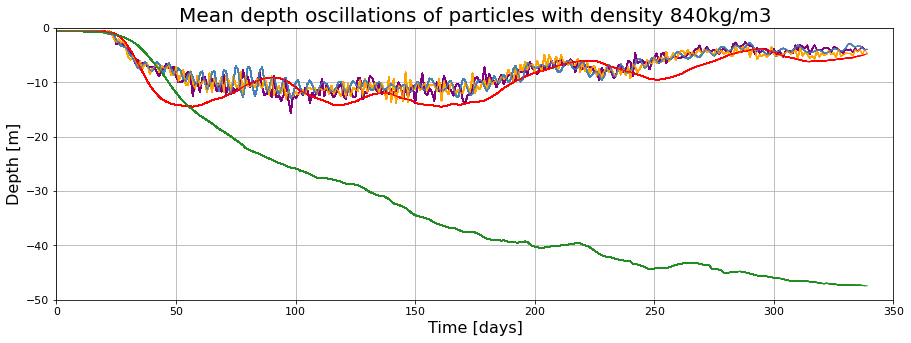

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
plt.grid()

def animate(i):
    data1 = df1.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data1.index, y=data1['depth'], data=data1, color="purple")

    data2 = df2.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data2.index, y=data2['depth'], data=data2, color="orange")
    
    data3 = df3.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data3.index, y=data3['depth'], data=data3, color="steelblue")
    
    data4 = df4.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data4.index, y=data4['depth'], data=data3, color="red")
    
    data5 = df5.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data5.index, y=data5['depth'], data=data3, color="forestgreen")
    
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=1)
    plt.ylim(-50, 0)
    plt.yticks(fontsize=11) #, rotation=90)
    plt.xlim(0, 350)
    plt.xticks(fontsize=11) #, rotation=90)
    #plt.legend(fontsize = 'x-large', loc = 'lower left')
    plt.ylabel('Depth [m]', fontsize = 16)
    plt.xlabel('Time [days]', fontsize = 16)
    plt.title('Mean depth oscillations of particles with density 840kg/m3', fontsize = 20)

ani = animation.FuncAnimation(fig, animate, frames=(len(df1) - 1), repeat=True, interval = 10**(-50))

ani.save('depth_840.gif')

#### <font color = steelblue> Depth profile animation for size 1e-4m

In [77]:
# define dataframes for animations
df1 = pd.DataFrame(-d30s4.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])
df2 = pd.DataFrame(-d84s4.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])
df3 = pd.DataFrame(-d92s4.z.mean(skipna = True, dim = 'traj').values, columns = ['depth'])

MovieWriter ffmpeg unavailable; using Pillow instead.


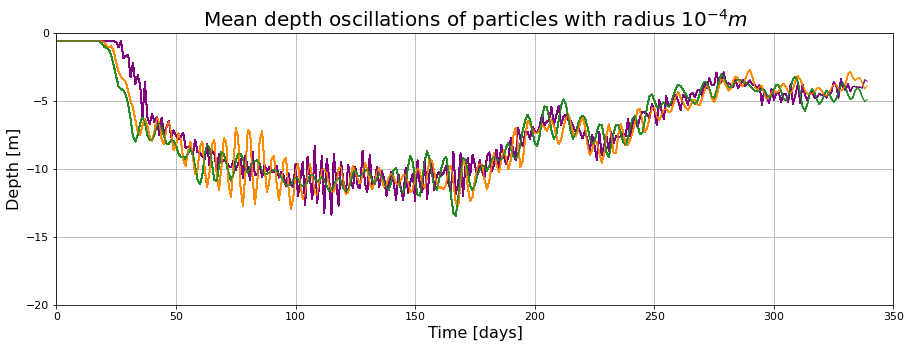

In [78]:
fig, ax = plt.subplots(figsize=(15,5))
plt.grid()

def animate(i):
    data1 = df1.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data1.index, y=data1['depth'], data=data1, color="purple")

    data2 = df2.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data2.index, y=data2['depth'], data=data2, color="darkorange")
    
    data3 = df3.iloc[:int(i+1)] #select data range
    p = sns.lineplot(x=data3.index, y=data3['depth'], data=data3, color="forestgreen")
        
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=1)
    plt.ylim(-20, 0)
    plt.yticks(fontsize=11) #, rotation=90)
    plt.xlim(0, 350)
    plt.xticks(fontsize=11) #, rotation=90)
    #plt.legend(fontsize = 'x-large', loc = 'lower left')
    plt.ylabel('Depth [m]', fontsize = 16)
    plt.xlabel('Time [days]', fontsize = 16)
    plt.title('Mean depth oscillations of particles with radius $10^{-4}m$', fontsize = 20)

ani = animation.FuncAnimation(fig, animate, frames=(len(df1) - 1), repeat=True, interval = 10**(-50))

ani.save('depth_1e4m.gif')

#### <font color = steelblue> Horizontal trajectories of all particles

MovieWriter ffmpeg unavailable; using Pillow instead.


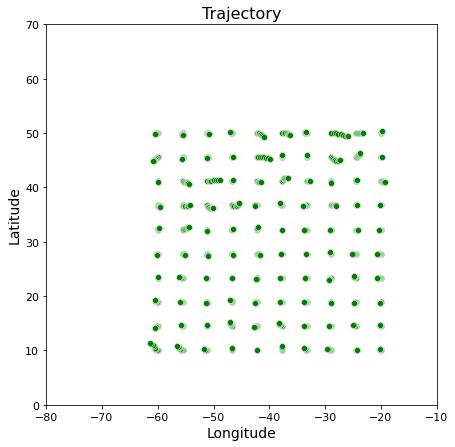

In [36]:
fig, ax = plt.subplots(figsize=(7,7))

def animate(i):
    for j in range(len(d84s2.lon[:, 0])):
        p = sns.scatterplot(x=d84s2.lon[j, :int(i)].values, y=d84s2.lat[j, :int(i)].values, color="red")
        p = sns.scatterplot(x=d84s5.lon[j, :int(i)].values, y=d84s5.lat[j, :int(i)].values, color="orange")
        p = sns.scatterplot(x=d84s6.lon[j, :int(i)].values, y=d84s6.lat[j, :int(i)].values, color="green")
        
    p.tick_params(labelsize=17)
    plt.setp(p.lines,linewidth=1)
    plt.ylim(0, 70)
    plt.yticks(fontsize=11) #, rotation=90)
    plt.xlim(-80, -10)
    plt.xticks(fontsize=11) #, rotation=90)
    plt.ylabel('Latitude', fontsize = 14)
    plt.xlabel('Longitude', fontsize = 14)
    plt.title('Trajectory', fontsize = 16)

ani = animation.FuncAnimation(fig, animate, frames=(len(d84s2.lon[0, :]) -1), repeat=True, interval = 10**(-10))

ani.save('trajectories.gif')